In [ ]:
!pip install pint

In [ ]:
import pint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
si = pint.UnitRegistry()

In [ ]:
M = 4.33 * si.kg            # mass of the substance [kg]
A = 0.572* si.m**2          # cross-sectional area [m^2]
D = 0.34 * si.m**2 / si.s   # diffusion coefficient [m^2 / s]
U = 0.57 * si.m / si.s      # flow velocity [m/s]
x = 32.1 * si.m             # position [m]

t_val = np.linspace(20, 100, 500) * si.s  # time [s]

In [ ]:
def c(t):
  return (M / A) * (1/(2*np.sqrt(np.pi * D * t))) * (x / t**(3/2)) * np.exp(-((U * t - x)**2 / (4 * D * t)))

## Spread of Substance in a Medium

The equation describes the spread of a substance (e.g., pollution) in the environment under the influence of:

- **Diffusion** – the phenomenon of particles dispersing according to the concentration gradient (described by $ D $),
- **Advection** – the transport of a substance within fluid motion (described by $ U $).

This is the analytical solution to the advection-diffusion equation:

$$
\frac{\partial C}{\partial t} + U \frac{\partial C}{\partial x} - D \frac{\partial^2 C}{\partial x^2} = 0
$$

The function $ C(x,t) $ gives the concentration of the substance at point $ x $ at time $ t $.

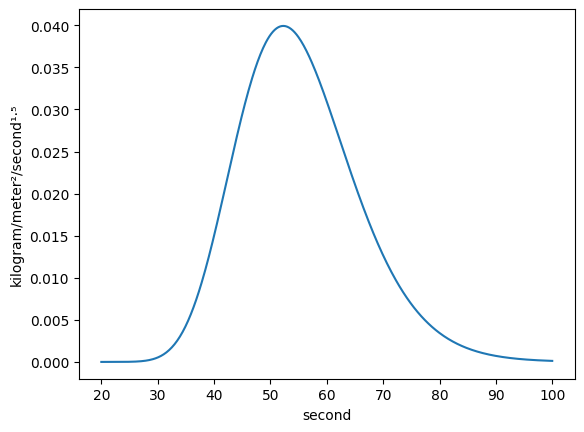

In [ ]:
si.setup_matplotlib()
plt.plot(t_val, c(t_val))
plt.show()